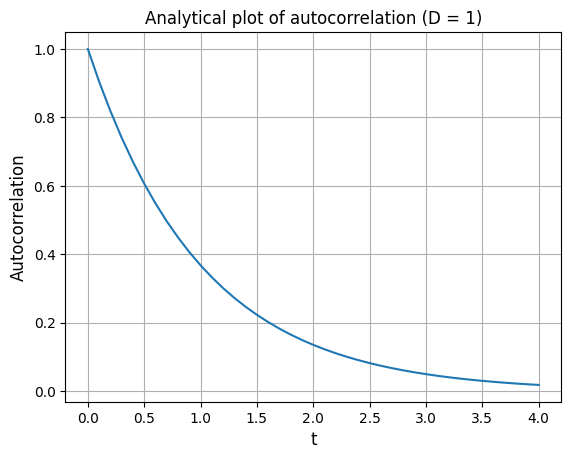

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

D = 1 #diffusion coefficient
plt.title('Analytical plot of autocorrelation (D = 1)', fontsize=12)
tau = np.arange(0, 4.1, 0.1)
Y_1 = np.exp(-D*tau)
plt.plot(tau, Y_1)
plt.xlabel('t',fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.grid()
plt.show()

In [2]:
from random import randrange as rand
from numpy import cos, sin, radians
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rd

mean = 0
V = 1
h = 0.001 #time steps
T = 1000
N = int(T/h) # number of steps
std = math.sqrt(2*D*h)


A = np.zeros((N,2), dtype=float)

def theta(D):
    Theta = np.zeros(N)
    theta = [0]
    for i in range(0,N):
        theta = theta + np.random.normal(mean,std,(1,1)) #gaussian white noise
        Theta[i] = theta
    return Theta
      
def forward_euler(x, y, i, Theta):
    theta = Theta[i]
    #forward euler
    x = x + V*h*math.cos(theta);          
    y = y + V*h*math.sin(theta);       
    return (x,y)

def random_walk(Theta):
    x, y = 0., 0.
    for i in range(N-1):
        
        x, y = forward_euler(x,y,i,Theta)
        A[i+1,:] = x, y
    return A

In [3]:
Theta_r = theta(D)
G = random_walk(Theta_r)

In [4]:
M = N
def Auto_cor(t):
    m = int(t/h)
    sum = 0
    for i in range(M-m):
        a = [math.cos(Theta_r[i]), math.sin(Theta_r[i])]
        b = [math.cos(Theta_r[i+m]), math.sin(Theta_r[i+m])]
        sum = sum + np.dot(a, b)
    return (sum/(M-m+1))

y_es = []
par = 0.6
for i in range(9):
    tau_1 = Auto_cor(par)
    y_es.append(tau_1)
    par +=0.2


In [5]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x_es = np.arange(0.6, 2.4, 0.2)

def func(x,b):
    return np.exp(-x/b)
popt, pcov = curve_fit(func, x_es, y_es)
xFit = np.arange(0.0, 4.0, 0.01)

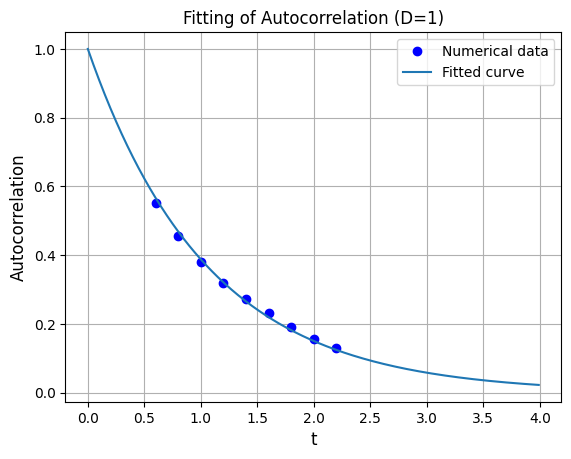

the estimated orientational persistence time = [1.05621942] while the theorectical value = 1.0


In [6]:
plt.plot(x_es, y_es, 'bo',label = 'Numerical data')
plt.plot(xFit, func(xFit, popt), label = 'Fitted curve')
plt.xlabel('t',  fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title("Fitting of Autocorrelation (D=1)")
plt.grid()
plt.legend()
plt.show()

print('the estimated orientational persistence time =', popt, 'while the theorectical value =', 1/D)

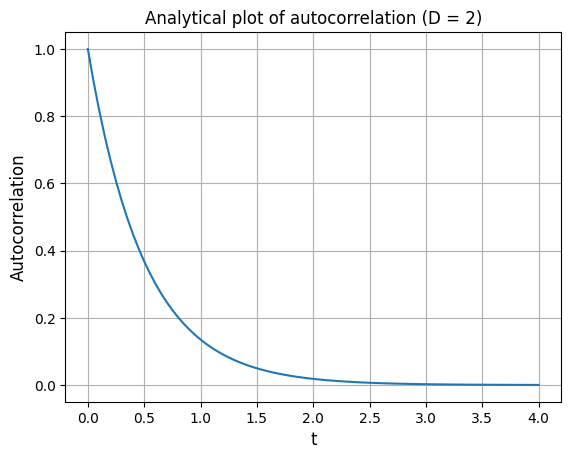

In [7]:
D = 2 #diffusion coefficient
tau = np.arange(0, 4.05, 0.05)
Y_1 = np.exp(-D*tau)
plt.plot(tau, Y_1)
plt.xlabel('t', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title('Analytical plot of autocorrelation (D = 2)', fontsize=12)
plt.grid()
plt.show()

In [8]:
std = math.sqrt(2*D*h)
Theta_r = theta(D)
G = random_walk(Theta_r)

In [9]:
y_es = []
par = 0.25
for i in range(9):
    tau_1 = Auto_cor(par)
    y_es.append(tau_1)
    par +=0.1


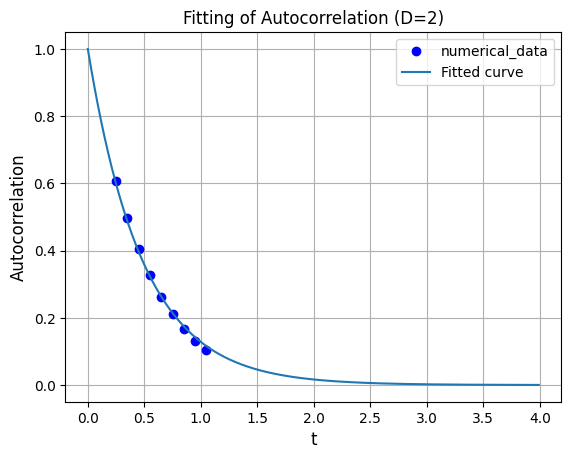

the estimated orientational persistence time = [0.48667547] while the theorectical value = 0.5


In [10]:
x_es = np.arange(0.25, 1.15, 0.1)
popt, pcov = curve_fit(func, x_es, y_es)
xFit = np.arange(0.0, 4.0, 0.01)

plt.plot(x_es, y_es, 'bo', label = 'numerical_data')
plt.plot(xFit, func(xFit, popt), label = 'Fitted curve')
plt.xlabel('t', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title("Fitting of Autocorrelation (D=2)")
plt.grid()
plt.legend()
plt.show()

print('the estimated orientational persistence time =', popt, 'while the theorectical value =', 1/D)


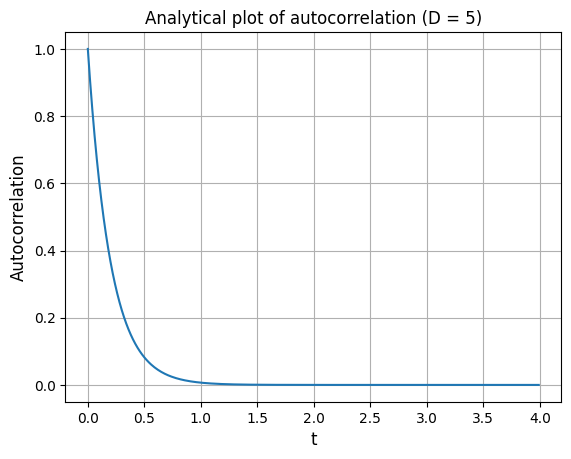

In [11]:
D = 5 #diffusion coefficient
tau = np.arange(0, 4, 0.01)
Y_1 = np.exp(-D*tau)
plt.plot(tau, Y_1)
plt.xlabel('t', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title('Analytical plot of autocorrelation (D = 5)', fontsize=12)
plt.grid()
plt.show()

In [12]:
std = math.sqrt(2*D*h)
Theta_r = theta(D)
G = random_walk(Theta_r)

In [13]:
y_es = []
par = 0.1
for i in range(9):
    tau_1 = Auto_cor(par)
    y_es.append(tau_1)
    par +=0.05


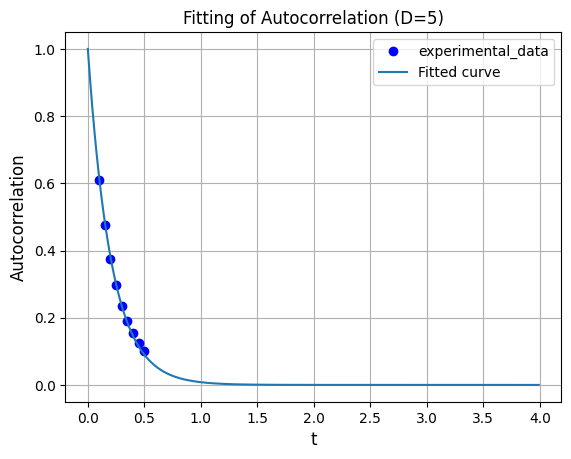

the estimated orientational persistence time = [0.20772577] while the theorectical value = 0.2


In [14]:
x_es = np.arange(0.1, 0.55, 0.05)
popt, pcov = curve_fit(func, x_es, y_es)
xFit = np.arange(0.0, 4.0, 0.01)

plt.plot(x_es, y_es, 'bo', label = 'experimental_data')
plt.plot(xFit, func(xFit, popt), label = 'Fitted curve')
plt.xlabel('t', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title("Fitting of Autocorrelation (D=5)")
plt.grid()
plt.legend()
plt.show()

print('the estimated orientational persistence time =', popt, 'while the theorectical value =', 1/D)